## Import Required Libraries

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

This cell imports all the necessary Python libraries required for this task.

- **NumPy** is used for numerical operations and matrix calculations required in logistic regression.
- **Pandas** is used for loading and manipulating the dataset.
- **Matplotlib** is used for visualizing data and model behavior.
- **Scikit-learn** utilities are used for:
  - Splitting the dataset into training and testing sets
  - Scaling features
  - Implementing logistic regression using a standard library
  - Evaluating model performance using common metrics

Importing all libraries at the beginning ensures a clean and organized workflow.

## Load the Dataset

In [22]:
df = pd.read_csv("framingham.csv")
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In this cell, the heart disease dataset is loaded into a Pandas DataFrame.

- The dataset contains medical attributes of patients.
- Each row represents a patient.
- The target column indicates whether the patient develops heart disease within 10 years.

Displaying the first few rows helps verify that the dataset is loaded correctly.

## Explore Dataset Structure

This step helps understand the structure and quality of the dataset. This exploration is essential before applying any machine learning model.

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


`info()` shows column names, data types, and missing values.

In [24]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


`describe()` provides statistical summaries such as mean and standard deviation.

In [25]:
df.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

Viewing column names helps identify the target variable.

## Check Missing Values

In [54]:
df.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


## Handle Missing Values

In [55]:
df = df.dropna()

Real-world datasets often contain missing values.

- This cell checks how many missing values exist in each column.
- Missing values are replaced with the mean of their respective columns.
- Mean imputation is a simple and effective technique for numerical data.

Handling missing values prevents errors during model training.

## Visualize Target Variable Distribution

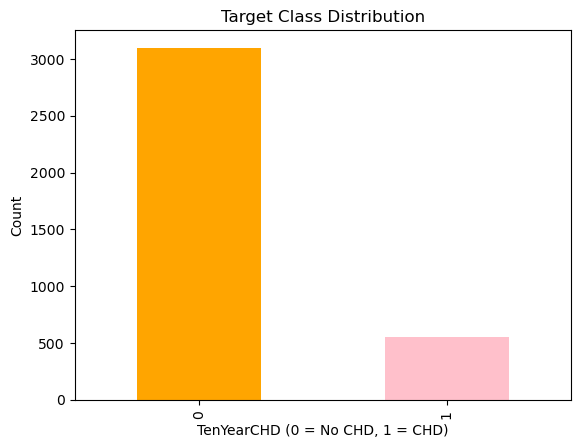

In [53]:
df["TenYearCHD"].value_counts().plot(
    kind="bar",
    color=["orange", "pink"]
)

plt.xlabel("TenYearCHD (0 = No CHD, 1 = CHD)")
plt.ylabel("Count")
plt.title("Target Class Distribution")
plt.show()

This bar chart shows the distribution of the target variable TenYearCHD.

- 0 represents no heart disease within 10 years.
- 1 represents the presence of heart disease within 10 years.

Visualizing class distribution helps identify whether the dataset is balanced or imbalanced, which is important for interpreting model performance.

## Separate Features and Target Variable

In [29]:
X = df.drop("TenYearCHD", axis=1)
y = df["TenYearCHD"]

In this step:
- Independent variables (features) are stored in **X**.
- The dependent variable (target) is stored in **y**.

The target variable **TenYearCHD** is removed from the feature set to prevent data leakage.

## Split Data into Training and Testing Sets

In [30]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

- 80% training data
- 20% testing data

The training set is used to train the model, while the testing set is used to evaluate performance on unseen data.
A fixed random state ensures reproducibility of results.

## Feature Scaling

In [31]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Feature scaling standardizes all features to have:
- Mean = 0
- Standard deviation = 1

This step is crucial for gradient descent to work efficiently and prevents features with larger values from dominating the learning process.

## Sigmoid Function

In [32]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

The sigmoid function converts any real-valued number into a value between 0 and 1.

This output can be interpreted as the probability of the positive class and is the core function used in logistic regression.

## Sigmoid Function Visualization

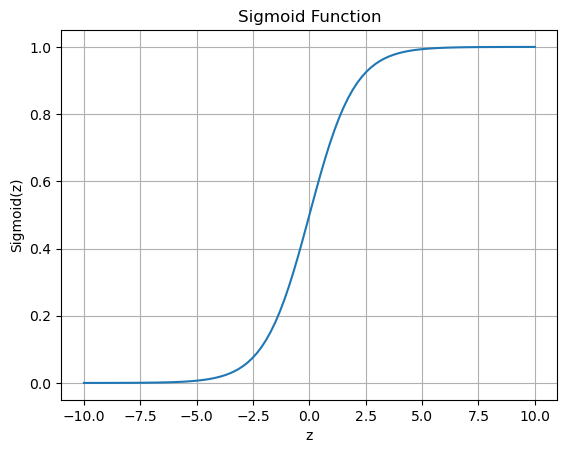

In [33]:
z = np.linspace(-10, 10, 100)
sig = sigmoid(z)

plt.plot(z, sig)
plt.xlabel("z")
plt.ylabel("Sigmoid(z)")
plt.title("Sigmoid Function")
plt.grid()
plt.show()

This plot visualizes how the sigmoid function maps input values to probabilities.

- Large negative values approach 0
- Large positive values approach 1
- The midpoint at 0 corresponds to probability 0.5

This helps understand how logistic regression makes classification decisions.

## Initialize Model Parameters

In [34]:
def initialize_parameters(n_features):
    weights = np.zeros(n_features)
    bias = 0
    return weights, bias

This step initializes:
- Weights for each feature
- Bias term

All weights are initialized to zero for simplicity.
These parameters will be updated during training using gradient descent.

## Gradient Descent Optimization

In [35]:
def gradient_descent(X, y, weights, bias, learning_rate, iterations):
    m = len(y)
    losses = []

    for _ in range(iterations):
        linear_model = np.dot(X, weights) + bias
        y_pred = sigmoid(linear_model)

        loss = -(1/m) * np.sum(
            y * np.log(y_pred + 1e-9) + (1 - y) * np.log(1 - y_pred + 1e-9)
        )
        losses.append(loss)

        dw = (1/m) * np.dot(X.T, (y_pred - y))
        db = (1/m) * np.sum(y_pred - y)

        weights -= learning_rate * dw
        bias -= learning_rate * db

    return weights, bias, losses

Gradient descent is used to train the logistic regression model.

In each iteration:
- Predictions are made using current weights
- Binary cross-entropy loss is calculated
- Gradients are computed
- Weights and bias are updated to minimize loss

Loss values are stored to visualize convergence.

## Prediction Function

In [36]:
def predict(X, weights, bias):
    linear_model = np.dot(X, weights) + bias
    y_pred = sigmoid(linear_model)
    return [1 if i >= 0.5 else 0 for i in y_pred]

This function:
- Computes probabilities using the trained model
- Converts probabilities into class labels using a threshold of 0.5

This allows the model to make binary predictions.

## Train Logistic Regression from Scratch

In [37]:
weights, bias = initialize_parameters(X_train_scaled.shape[1])

weights, bias, losses = gradient_descent(
    X_train_scaled,
    y_train.values,
    weights,
    bias,
    learning_rate=0.01,
    iterations=1000
)

This step trains the model using:
- Scaled training data
- Gradient descent optimization
- A fixed learning rate and number of iterations

The trained weights, bias, and loss history are returned.

## Loss vs Iterations

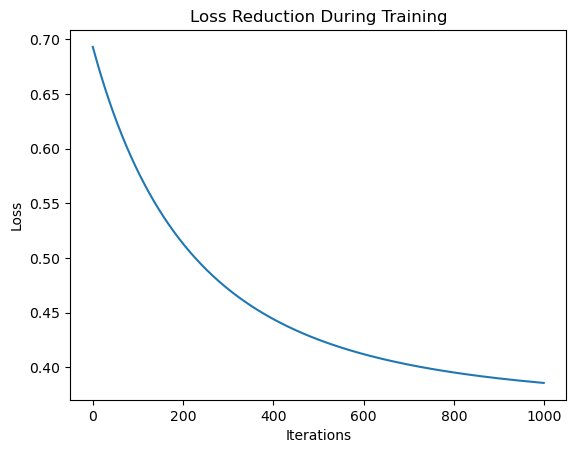

In [38]:
plt.plot(losses)
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Loss Reduction During Training")
plt.show()

This plot shows how the loss decreases over training iterations.

A steadily decreasing loss indicates that the model is learning effectively and that gradient descent is converging.

## Predictions Using Scratch Model

In [39]:
y_pred_scratch = predict(X_test_scaled, weights, bias)

The trained logistic regression model is used to predict outcomes on the test dataset.

These predictions will be used for performance evaluation.

## Logistic Regression Using Scikit-learn

In [40]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

y_pred_sklearn = model.predict(X_test_scaled)

This cell trains a logistic regression model using scikit-learn.

Scikit-learn internally handles optimization, regularization, and convergence, providing a reliable benchmark for comparison.

## Evaluate Scratch Model Performance

In [41]:
print("LOGISTIC REGRESSION FROM SCRATCH")
print("Accuracy :", accuracy_score(y_test, y_pred_scratch))
print("Precision:", precision_score(y_test, y_pred_scratch))
print("Recall   :", recall_score(y_test, y_pred_scratch))
print("F1 Score :", f1_score(y_test, y_pred_scratch))

LOGISTIC REGRESSION FROM SCRATCH
Accuracy : 0.8346994535519126
Precision: 0.5384615384615384
Recall   : 0.05737704918032787
F1 Score : 0.1037037037037037


The scratch model is evaluated using:
- Accuracy
- Precision
- Recall
- F1-score

These metrics provide a comprehensive understanding of classification performance.

## Evaluate Scikit-learn Model Performance

In [42]:
print("\nLOGISTIC REGRESSION USING SCIKIT-LEARN")
print("Accuracy :", accuracy_score(y_test, y_pred_sklearn))
print("Precision:", precision_score(y_test, y_pred_sklearn))
print("Recall   :", recall_score(y_test, y_pred_sklearn))
print("F1 Score :", f1_score(y_test, y_pred_sklearn))


LOGISTIC REGRESSION USING SCIKIT-LEARN
Accuracy : 0.8360655737704918
Precision: 0.5555555555555556
Recall   : 0.08196721311475409
F1 Score : 0.14285714285714285


The same evaluation metrics are applied to the scikit-learn model to ensure a fair comparison between implementations.

## Feature Importance Visualization

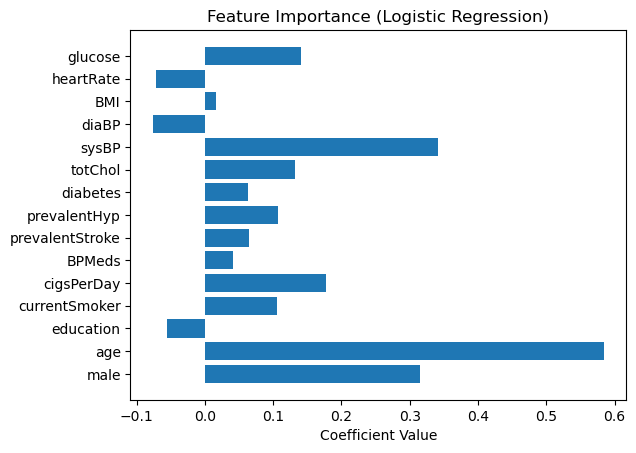

In [43]:
importance = model.coef_[0]

plt.barh(X.columns, importance)
plt.xlabel("Coefficient Value")
plt.title("Feature Importance (Logistic Regression)")
plt.show()

This visualization displays the contribution of each feature to the prediction.

Positive coefficients increase the probability of heart disease, while negative coefficients decrease it.
This improves interpretability of the model.